In [11]:

from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate


llm = ChatOpenAI()
llm.invoke('how can we do 22 + 322 easily')

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are world class technical documentation writer."),
    ("user", "{input}")
])


chain = prompt | llm 
chain.invoke({"input": "what is the best way to write technical documentation"})

AIMessage(content='The best way to write technical documentation is to follow a systematic approach that ensures clarity, accuracy, and comprehensiveness. Here are some steps to help you write effective technical documentation:\n\n1. Understand the audience: Identify who will be using the documentation and what their level of technical expertise is. Tailor your writing style and level of detail accordingly.\n\n2. Define the purpose: Clearly define the goals and objectives of the documentation. Are you providing instructions, troubleshooting information, or reference material? Understanding the purpose will help you structure your content effectively.\n\n3. Plan and outline: Create a logical structure for your documentation. Break it down into sections, chapters, or modules, depending on the complexity of the subject matter. A well-organized outline will guide your writing process and make it easier for readers to navigate the documentation.\n\n4. Use plain language: Write in a clear, c

In [7]:

from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate.from_template("tell me a joke about {foo}")
model = ChatOpenAI()
chain = prompt | model
chain.invoke({"foo": "bears"})


AIMessage(content='Why did the bear bring a ladder to the picnic?\n\nBecause it heard the food was at the top of the food chain!')

Now Let's try to chain with a REPL 

In [20]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import (
    ChatPromptTemplate,
)
from langchain_experimental.utilities import PythonREPL
from langchain_openai import ChatOpenAI

In [22]:
template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

model = ChatOpenAI(temperature=0.2)

In [23]:
def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

In [25]:
chain = prompt | model | StrOutputParser() | _sanitize_output | PythonREPL().run

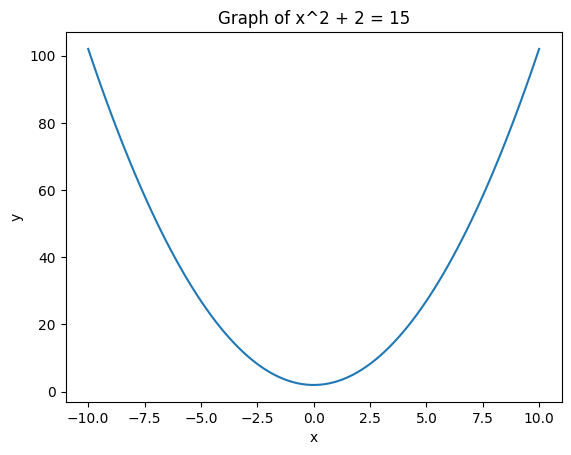

''

In [28]:
chain.invoke({"input": "graph of x^2 plus 2 equals 15"})

Now that I know it works I'll try to create a template that suits my purpose.
Ideally you need a few templates, one for each use case. 
I will go back and add libraries I will need also. 

In [115]:
import pandas as pd 
df = pd.read_html('./players_Big 5 European Leagues Combined_2324_standard.html')
df = df[0]
df.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2   Brenden Aaronson             us USA                 MF   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4   Yunis Abdelhamid             ma MAR                 DF   
4                  5  Salis Abdul Samed             gh GHA                 MF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League             24-005   
1       Union Berlin       de Bundesliga             23-079   
2     Eint Frankfurt       de Bundesliga             20-136   
3              Reims          fr Ligue 1             36-103   
4               Lens          fr Ligue 1             23-289   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2000           13     11  ...           0.09  0.09  0.00   
1               2000           11      4  ...           0.00  0.00  0.00   
2               2003            7      1  ...           0.89  0.89  0.00   
3               1987           16     16  ...           0.00  0.19  0.19   
4               2000           17     14  ...           0.00  0.00  0.00   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.09  0.00  0.07   0.07  0.00     0.07             Matches  
1   0.00  0.04  0.07   0.11  0.04     0.11             Matches  
2   0.89  0.11  0.07   0.19  0.11     0.19             Matches  
3   0.19  0.14  0.01   0.15  0.14     0.15             Matches  
4   0.00  0.06  0.04   0.10  0.06     0.10             Matches  

[5 rows x 38 columns]

In [116]:
df.reset_index(inplace=True)


index Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                        Rk             Player             Nation   
0     0                  1         Max Aarons            eng ENG   
1     1                  2   Brenden Aaronson             us USA   
2     2                  3    Paxten Aaronson             us USA   
3     3                  4   Yunis Abdelhamid             ma MAR   
4     4                  5  Salis Abdul Samed             gh GHA   

  Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                 Pos              Squad                Comp   
0                 DF        Bournemouth  eng Premier League   
1                 MF       Union Berlin       de Bundesliga   
2                 MF     Eint Frankfurt       de Bundesliga   
3                 DF              Reims          fr Ligue 1   
4                 MF               Lens          fr Ligue 1   

  Unnamed: 6_level_0 Unnamed: 7_level_0 Playing Time  ... Per 90 Minutes  \
                 Age               Born           MP  ...            Ast   
0             24-005               2000           13  ...           0.09   
1             23-079               2000           11  ...           0.00   
2             20-136               2003            7  ...           0.89   
3             36-103               1987           16  ...           0.00   
4             23-289               2000           17  ...           0.00   

                                                       Unnamed: 37_level_0  
    G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0  0.09  0.00   0.09  0.00  0.07   0.07  0.00     0.07             Matches  
1  0.00  0.00   0.00  0.04  0.07   0.11  0.04     0.11             Matches  
2  0.89  0.00   0.89  0.11  0.07   0.19  0.11     0.19             Matches  
3  0.19  0.19   0.19  0.14  0.01   0.15  0.14     0.15             Matches  
4  0.00  0.00   0.00  0.06  0.04   0.10  0.06     0.10             Matches  

[5 rows x 39 columns]

0       17
1        4
2        2
3       23
4        7
        ..
2523    11
2524    25
2525    49
2526     2
2527    14
Name: PrgC, Length: 2528, dtype: object

In [117]:
df.columns = df.columns.droplevel(0)

In [118]:
df.columns =['', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
       'xG+xAG/90', 'npxG/90', 'npxG+xAG/90']


In [112]:
[ 'Age', 
       'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
       'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Matches']

In [131]:
df['Age'] = df['Age'].str[:2]
df['Age'] =pd.to_numeric(df['Age'], errors='coerce')
df['90s'] =pd.to_numeric(df['90s'], errors='coerce')

In [135]:
columns_to_convert = ['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
                      'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
                      'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90',
                      'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df.MP = pd.to_numeric(df.MP, errors='coerce')

In [165]:
import json


In [153]:
u_prompt = "top ten players with more than 5 goals"
players_with_more_than_5_goals = df[df['Gls'] > 5][['Player','Squad' ,'Comp','Gls', 'MP', 'Nation', 'Age', 'xG']] 
players_with_more_than_5_goals = players_with_more_than_5_goals.sort_values(by='Gls', ascending=False)
players_with_more_than_5_goals.head(10)


,Player,Squad,Comp,Gls,MP,Nation,Age,xG
1128,Harry Kane,Bayern Munich,de Bundesliga,21.0,15.0,eng ENG,30,15.1
1478,Kylian Mbappé,Paris S-G,fr Ligue 1,18.0,16.0,fr FRA,25,14.9
918,Serhou Guirassy,Stuttgart,de Bundesliga,17.0,14.0,gn GUI,27,11.6
1439,Lautaro Martínez,Inter,it Serie A,16.0,17.0,ar ARG,26,9.7
933,Erling Haaland,Manchester City,eng Premier League,14.0,15.0,no NOR,23,14.8
2037,Mohamed Salah,Liverpool,eng Premier League,14.0,20.0,eg EGY,31,14.3
222,Jude Bellingham,Real Madrid,es La Liga,13.0,17.0,eng ENG,20,7.2
1469,Borja Mayoral,Getafe,es La Liga,12.0,19.0,es ESP,26,8.7
989,Son Heung-min,Tottenham,eng Premier League,12.0,20.0,kr KOR,31,7.1
1581,Álvaro Morata,Atlético Madrid,es La Liga,12.0,18.0,es ESP,31,8.7


In [172]:
u_prompt = "players with most xg in the epl "
players_eng_xg = df[df['Comp'] == 'eng Premier League'][['Player','Squad', 'Comp', 'xG', 'MP', 'Nation', 'Age']]
players_eng_xg = players_eng_xg.sort_values(by='xG', ascending=False)
players_eng_xg.head(10).to_json(orient='records')


'[{"Player":"Erling Haaland","Squad":"Manchester City","Comp":"eng Premier League","xG":14.8,"MP":15.0,"Nation":"no NOR","Age":"23"},{"Player":"Mohamed Salah","Squad":"Liverpool","Comp":"eng Premier League","xG":14.3,"MP":20.0,"Nation":"eg EGY","Age":"31"},{"Player":"Dominic Solanke","Squad":"Bournemouth","Comp":"eng Premier League","xG":11.0,"MP":19.0,"Nation":"eng ENG","Age":"26"},{"Player":"Nicolas Jackson","Squad":"Chelsea","Comp":"eng Premier League","xG":10.6,"MP":19.0,"Nation":"sn SEN","Age":"22"},{"Player":"Alexander Isak","Squad":"Newcastle Utd","Comp":"eng Premier League","xG":9.2,"MP":15.0,"Nation":"se SWE","Age":"24"},{"Player":"Ollie Watkins","Squad":"Aston Villa","Comp":"eng Premier League","xG":9.0,"MP":20.0,"Nation":"eng ENG","Age":"28"},{"Player":"Darwin N\\u00fa\\u00f1ez","Squad":"Liverpool","Comp":"eng Premier League","xG":8.6,"MP":19.0,"Nation":"uy URU","Age":"24"},{"Player":"Bryan Mbeumo","Squad":"Brentford","Comp":"eng Premier League","xG":8.5,"MP":15.0,"Nation":"

In [173]:
u_prompt = "top goal scorer in la liga"
players_laliga = df[df['Comp'] == 'es La Liga'][['Player', 'Squad','Comp', 'Gls', 'MP', 'Nation', 'Age']]
players_laliga = players_laliga.sort_values(by='Gls', ascending=False)
s = players_laliga.head(1)
s.to_json(orient='records')

'[{"Player":"Jude Bellingham","Squad":"Real Madrid","Comp":"es La Liga","Gls":13.0,"MP":17.0,"Nation":"eng ENG","Age":"20"}]'

In [174]:
u_prompt = "compare the top goal scorer in la liga and epl"
players_laliga = df[df['Comp'] == 'es La Liga'][['Player', 'Squad','Comp', 'Gls', 'Ast','G+A' , 'xG/90', 'Gls/90','xAG/90']]
players_laliga = players_laliga.sort_values(by='Gls', ascending=False)
s = players_laliga.head(1)
players_epl = df[df['Comp'] == 'eng Premier League'][['Player','Squad', 'Comp', 'Gls', 'Ast','G+A','xG/90', 'Gls/90','xAG/90']]
players_epl = players_epl.sort_values(by='Gls', ascending=False)
s2 = players_epl.head(1)
a=s.to_json(orient='records')
b =s2.to_json(orient='records')

In [178]:
player1 = json.loads(a)
player2 = json.loads(b)

{'Player': 'Jude Bellingham',
 'Squad': 'Real Madrid',
 'Comp': 'es La Liga',
 'Gls': 13.0,
 'Ast': 2.0,
 'G+A': 15.0,
 'xG/90': 0.44,
 'Gls/90': 0.8,
 'xAG/90': 0.14}

In [167]:
player1[0]['Player']

'Jude Bellingham'

In [125]:
def check_column_types(df):
    column_types = []
    for column in df.columns:
        column_type = df[column].dtype
        column_types.append((column, column_type))
    return column_types
print(check_column_types(df))

[('', dtype('int64')), ('Rk', dtype('O')), ('Player', dtype('O')), ('Nation', dtype('O')), ('Pos', dtype('O')), ('Squad', dtype('O')), ('Comp', dtype('O')), ('Age', dtype('O')), ('Born', dtype('O')), ('MP', dtype('O')), ('Starts', dtype('O')), ('Min', dtype('O')), ('90s', dtype('O')), ('Gls', dtype('O')), ('Ast', dtype('O')), ('G+A', dtype('O')), ('G-PK', dtype('O')), ('PK', dtype('O')), ('PKatt', dtype('O')), ('CrdY', dtype('O')), ('CrdR', dtype('O')), ('xG', dtype('O')), ('npxG', dtype('O')), ('xAG', dtype('O')), ('npxG+xAG', dtype('O')), ('PrgC', dtype('O')), ('PrgP', dtype('O')), ('PrgR', dtype('O')), ('Gls/90', dtype('O')), ('Ast/90', dtype('O')), ('G+A/90', dtype('O')), ('G-PK/90', dtype('O')), ('G+A-PK/90', dtype('O')), ('xG/90', dtype('O')), ('xAG/90', dtype('O')), ('xG+xAG/90', dtype('O')), ('npxG/90', dtype('O')), ('npxG+xAG/90', dtype('O')), ('Matches', dtype('O'))]


In [ ]:
prompt = ''' 
A dataframe is such that df.columns =['', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
       'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Matches']  it holds football records of players in the top 5 leagues in Europe.
       
       generate python  code to find the answers to questions below:
       who is the top goalscorer in france league?
       df[df.Comp == 'fr Ligue 1']['Gls'].max()'''

In [ ]:
'[{"Player":"Erling Haaland","Squad":"Manchester City","Comp":"eng Premier League","Gls":14.0,"Ast":4.0,"G+A":18.0,"xG\\/90":1.03,"Gls\\/90":0.97,"xAG\\/90":0.22}]'

In [186]:
player1= player1[0]
player2= player2[0]


In [187]:
player1

{'Player': 'Jude Bellingham',
 'Squad': 'Real Madrid',
 'Comp': 'es La Liga',
 'Gls': 13.0,
 'Ast': 2.0,
 'G+A': 15.0,
 'xG/90': 0.44,
 'Gls/90': 0.8,
 'xAG/90': 0.14}

In [188]:
player2

{'Player': 'Erling Haaland',
 'Squad': 'Manchester City',
 'Comp': 'eng Premier League',
 'Gls': 14.0,
 'Ast': 4.0,
 'G+A': 18.0,
 'xG/90': 1.03,
 'Gls/90': 0.97,
 'xAG/90': 0.22}

In [199]:
params = list(player1.keys())

In [203]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

# parameter names of the statistics we want to show


params_chosen = params[3:]
print(params_chosen)

low = [df[i].quantile(0.05) for i in df[params_chosen]]
high = [df[i].quantile(0.95) for i in df[params_chosen]]


['Gls', 'Ast', 'G+A', 'xG/90', 'Gls/90', 'xAG/90']


In [212]:
radar = Radar(params_chosen, low, high,
              
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params_chosen),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)


In [207]:
player1_values = df[df.Player == player1['Player']][params_chosen].values.tolist()[0]

In [215]:
player1['Player']

'Jude Bellingham'

In [208]:
player1_values

[13.0, 2.0, 15.0, 0.44, 0.8, 0.14]

In [210]:
player2_values

[14.0, 4.0, 18.0, 1.03, 0.97, 0.22]

In [209]:
player2_values = df[df.Player == player2['Player']][params_chosen].values.tolist()[0]

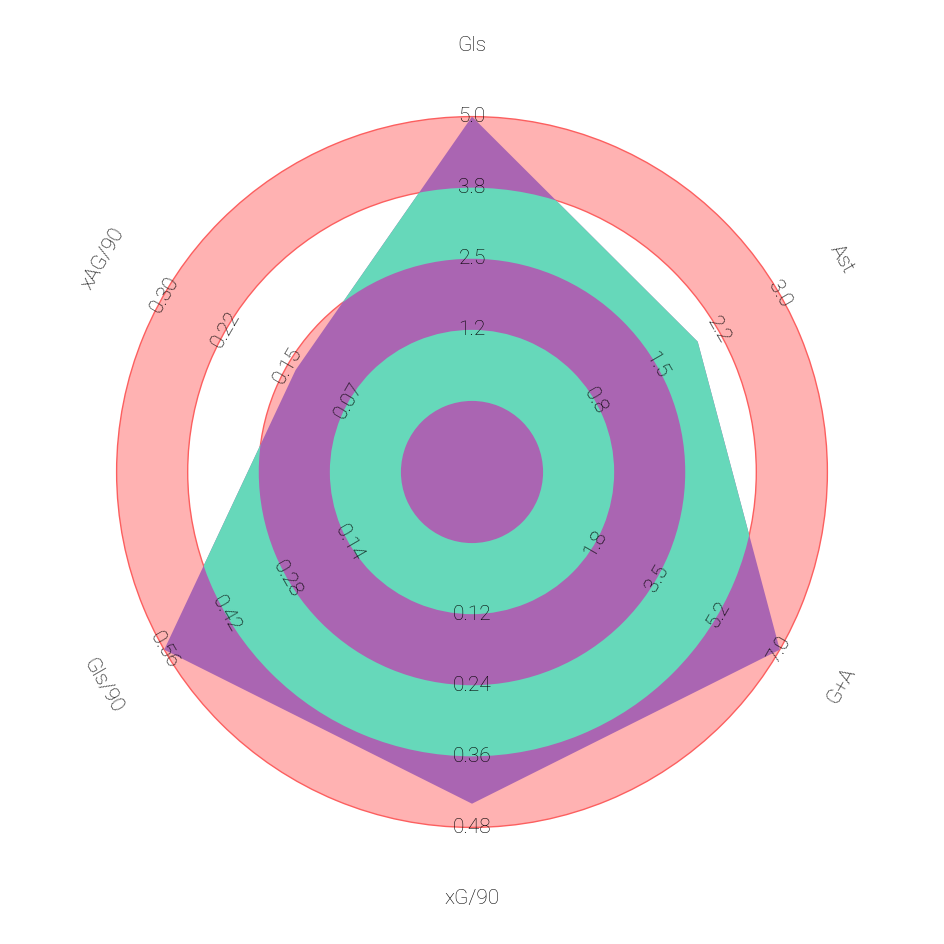

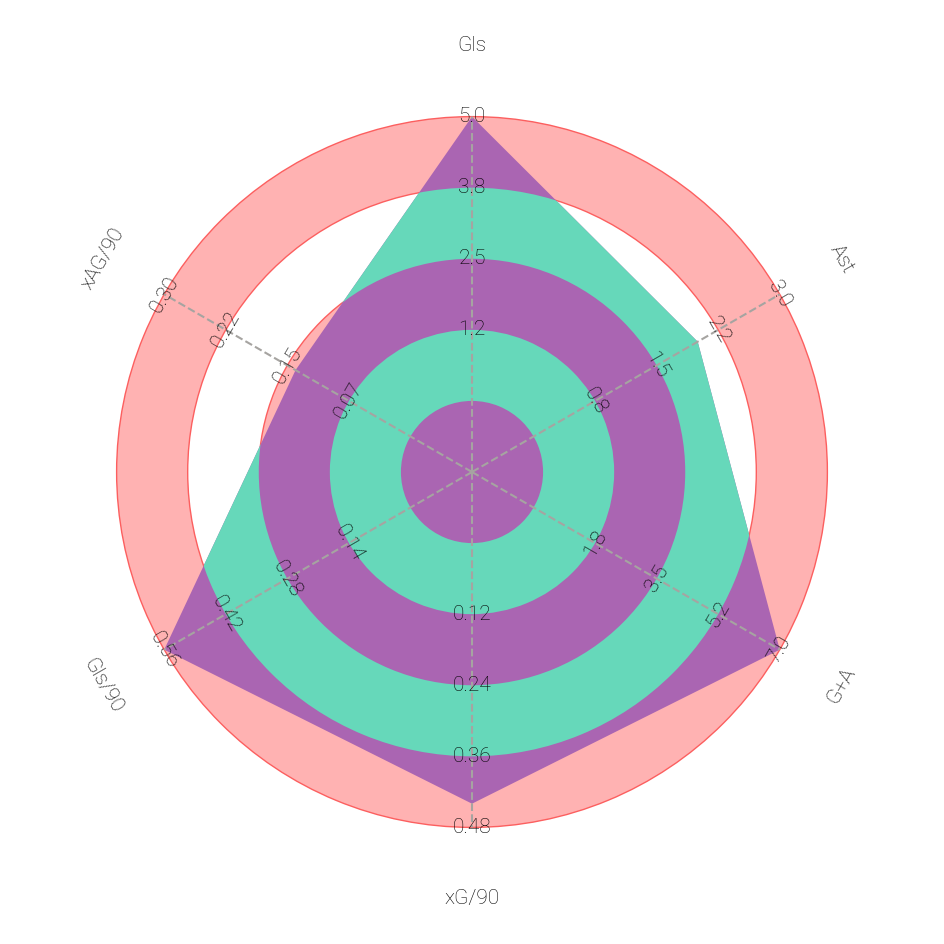

In [243]:
'''
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(player1_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels

##############################################################################
# Adding lines from the center to the edge
# ----------------------------------------
# Here we add spokes from the radar center to the edge using ``Radar.spoke``.

fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(player1_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15, zorder=2.5,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels
lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)
'''

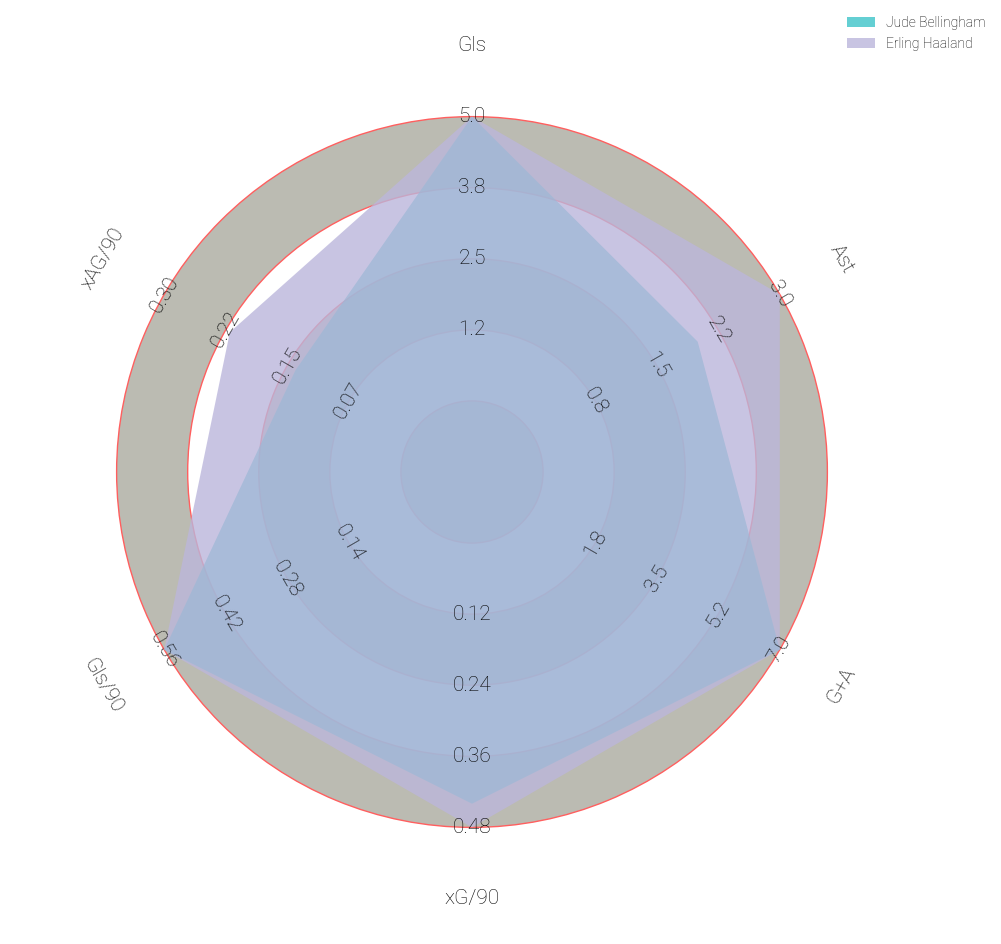

In [244]:

# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#bbbbb2', edgecolor='#ff5f5f')
radar_output = radar.draw_radar_compare(player1_values, player2_values, ax=ax,
                                        kwargs_radar={'facecolor': '#22bbc1', 'alpha': 0.7},
                                        kwargs_compare={'facecolor': '#bbb6db', 'alpha': 0.8})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)

# add legend
legend = ax.legend([radar_poly, radar_poly2], [player1['Player'], player2['Player']],
                   loc=(0.9, .95), fontsize=15, frameon=False, prop=robotto_thin.prop)


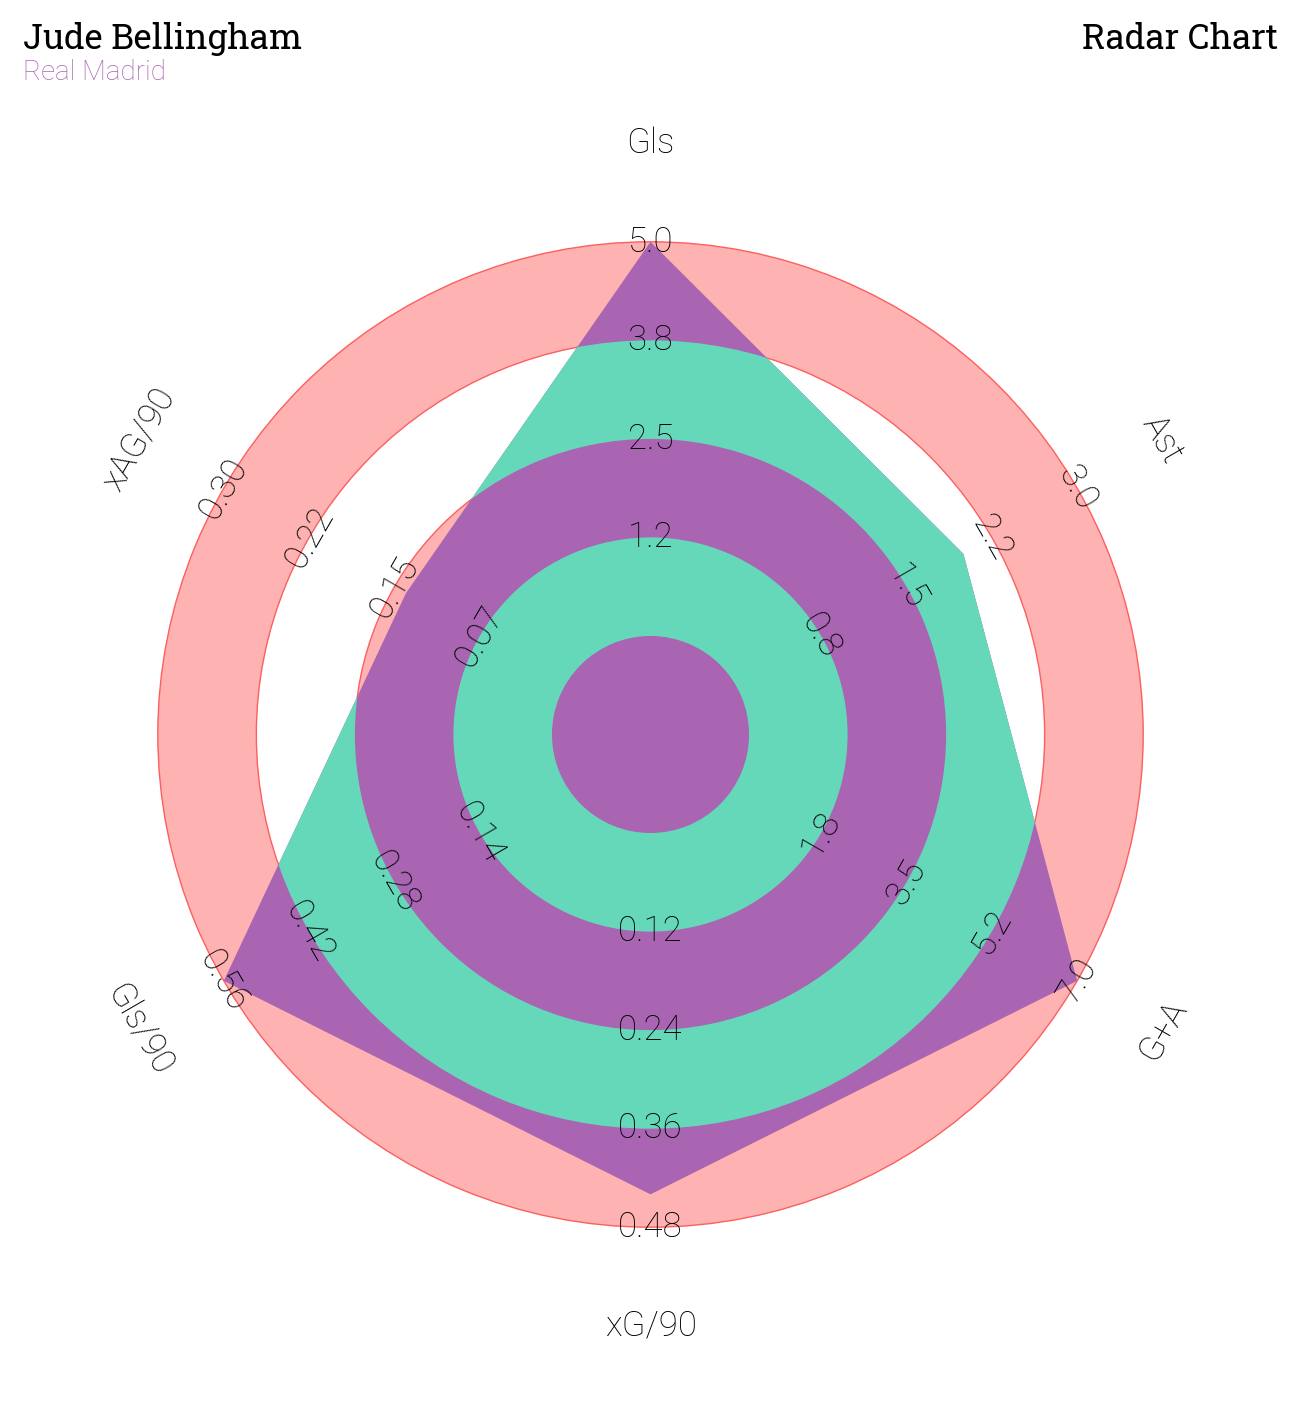

In [223]:


rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(player1_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output

##############################################################################
# Adding a title and endnote
# --------------------------
# Here we will add an endnote and title to the Radar. We will use the grid function to create
# the figure and pass the axs['radar'] axes to the Radar's methods.

# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'])
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar(player1_values, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)



title1_text = axs['title'].text(0.01, 0.65, player1['Player'], fontsize=25,
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, player1['Squad'], fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#aa65b2')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='right', va='center')

